# 1. Import the packages

In [1]:
#Import gensim, our library for text analysis
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag
nltk.download('wordnet',quiet=True)
#nltk.download('punkt',quiet=True)   #required by word_tokenize method
nltk.download('averaged_perceptron_tagger',quiet=True) #required by pos_tag method

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this

# Print out  all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #default 'last_expr'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) 

# Import usual data analysis tools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pickle

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

import re

# 2. Load the dataset

In [2]:
data_words_bigrams = pd.read_pickle('datafullfinal+bigram8-10.pkl')
len(data_words_bigrams)

852

# 3. Descriptive analysis

Total words: 199578, unique words: 10202


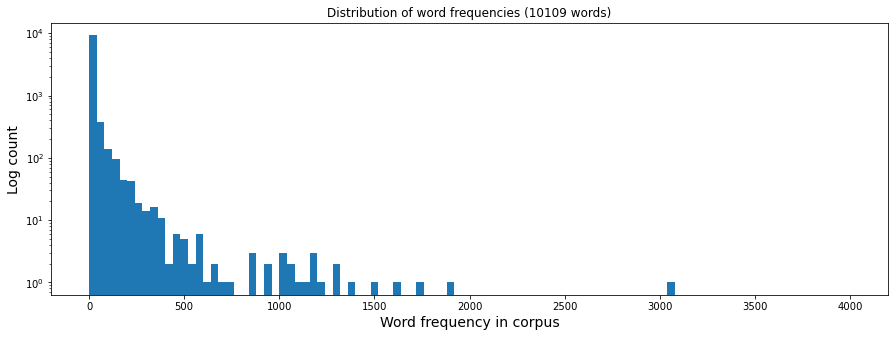

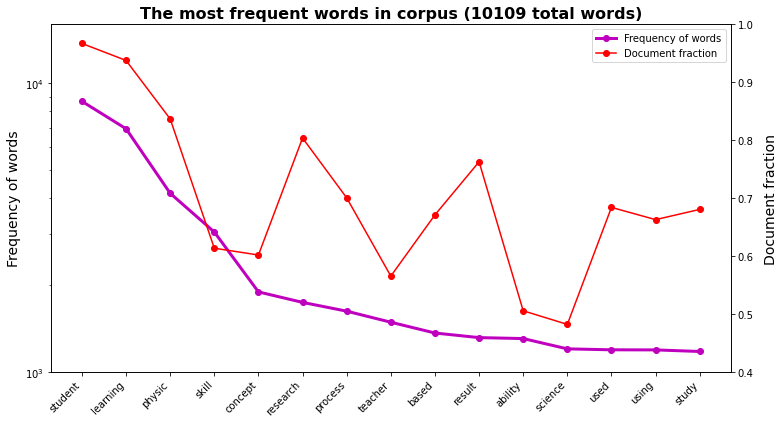

In [3]:
corpus = [ w for doc in data_words_bigrams for w in doc ]

def plot_freq_dist(freq_list, **kwargs):
    fig = plt.subplots(figsize=(15,5))
    _ = plt.hist(freq_list, bins=100, **kwargs);
    _ = plt.title("Distribution of word frequencies ("+str(len(freq_list))+" words)");
    _ = plt.xlabel("Word frequency in corpus", {'fontsize': 14});
    _ = plt.ylabel("Log count", {'fontsize': 14});
    plt.yscale('log', nonpositive='clip');
    plt.show();
    return fig

def get_top_n_words(corpus, n_top_words=None):
    count_vectorizer = CountVectorizer(stop_words='english')
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx], idx) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return zip(*words_freq[:n_top_words])

def plot_words_freq(word_list, freq_list, n_top_words=20, ylim=None, plot_doc_fraction = False):
    fig, ax = plt.subplots(figsize=(11,6))
    word_len = str(len(word_list))
    freq_list = freq_list[:n_top_words]
    word_list = word_list[:n_top_words]
    ax.plot(range(len(freq_list)), freq_list, 'mo-', linewidth = 3, label='Frequency of words');
    ax.set_xticks(range(len(word_list)));
    xticks = list(map(lambda w: str(w), word_list));
    ax.set_xticklabels(xticks, rotation=45, ha='right', fontdict={'fontweight': 'normal'});
    ax.set_title('The most frequent words in corpus (' + word_len + ' total words)', {'fontsize': 16, 'fontweight': 'bold'});
    ax.set_ylabel('Frequency of words', {'fontsize': 14});
    ax.set_yscale('log', nonpositive='clip', );
    if ylim:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim([10**(np.floor(np.log10(min(freq_list[:n_top_words]))*10)/10), 10**(np.ceil(np.log10(max(freq_list))*10)/10)]);    

#Document Fraction
    if plot_doc_fraction:
        frac = [sum([w in temp for temp in data_words_bigrams])/len(data_words_bigrams) for w in words[:n_top_words]]
        ax2 = ax.twinx()
        ax2.plot(range(len(freq_list)), frac, 'ro-', label='Document fraction');
        ax2.set_ylim([np.floor(min(frac)*10)/10,1])
        ax2.set_ylabel('Document fraction', {'fontsize': 14}, labelpad=10);
        plt.legend(loc='best')    
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='upper right')    
    plt.tight_layout()
    plt.show();
    return fig, ax

print('Total words: \033[1m%d\033[0m, unique words: \033[1m%d\033[0m' % (len(corpus), len(set(corpus))))

[words, freq, ids] = get_top_n_words(corpus, n_top_words=None)
fig = plot_freq_dist(freq, range=[0,4000])
fig, ax = plot_words_freq(words, freq, 15, [1000,16000], plot_doc_fraction = True)

In [4]:
pd.DataFrame(freq,words)[:77]

,0
student,8666
learning,6962
physic,4162
skill,3056
concept,1896
...,...
good,334
thinking_skill,333
curriculum,329
done,327


# 4. Filtering to the most often and the rarest words

Unfiltered Dictionary contains 10202 unique words

Applying no_below=8 and no_above=0.55 removes 7817 words:
 ['aa', 'aaa', 'aachen', 'aahk', 'aang', 'ab', 'abandoned', 'abb', 'abbreviated', 'abbreviation', 'abdul', 'abidin', 'abilitiy', 'abilityare', 'abilityto', 'abilty', 'ablility', 'abound', 'aboung', 'aboutthe', 'abrasion', 'abreast', 'abroad', 'absence', 'absent', 'absi', 'absolute', 'absolutely', 'absoption', 'absorb', 'absorbed', 'absorption', 'abstarct', 'abstraction', 'abstractly', 'abstractness', 'abul', 'abundant', 'abung', 'ac', 'academy', 'accelerate', 'accelerated', 'accelerator', 'accelerometer', 'accept', 'acceptable', 'acceptance', 'acces', 'accessibility', 'accommodated', 'accommodating', 'accommodation', 'accommodative', 'accompanies', 'accompany', 'accomplish', 'accomplished', 'accomplishment', 'accordingly', 'accountability', 'accountable', 'accpeted', 'accredited', 'accumulate', 'accumulated', 'accumulation', 'accured', 'acd', 'ace', 'aceh', 'achievable', 'achiev

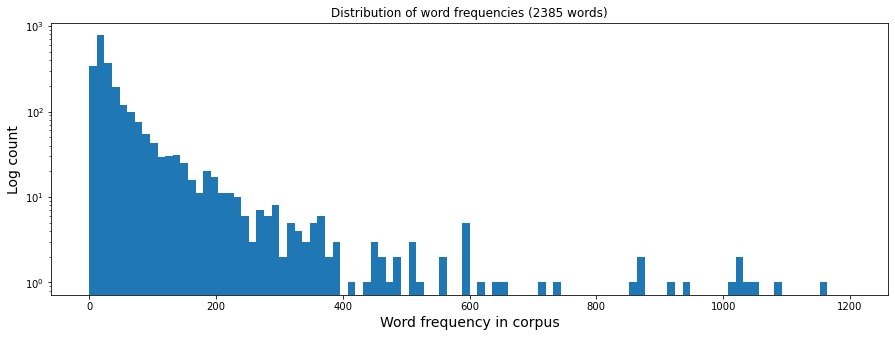

(<Figure size 1080x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Distribution of word frequencies (2385 words)'}, xlabel='Word frequency in corpus', ylabel='Log count'>)

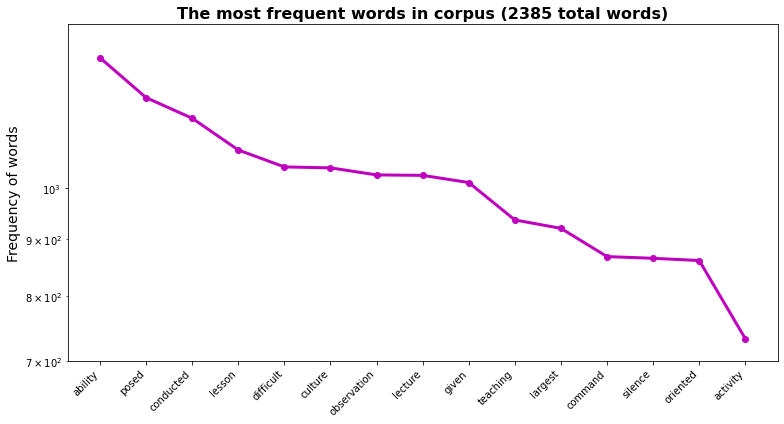

(<Figure size 792x432 with 1 Axes>,
 <AxesSubplot:title={'center':'The most frequent words in corpus (2385 total words)'}, ylabel='Frequency of words'>)

In [5]:
no_below = 8
no_above = 0.55

id2word_unfiltered = gensim.corpora.Dictionary(data_words_bigrams) #Needed for a bug
print("Unfiltered Dictionary contains \033[1m%d\033[0m unique words" % len(id2word_unfiltered))

id2word = gensim.corpora.Dictionary(data_words_bigrams)
id2word.filter_extremes(no_below=no_below, no_above=no_above, keep_n=100000)

#Effect of using no_above
diff_set = set(list(id2word_unfiltered.values())) - set(list(id2word.values()))
print("\nApplying \033[1mno_below=%.0f \033[1mand \033[1mno_above=%.2f removes %d words\033[0m:\n %s \n" % (no_below, no_above, len(diff_set), sorted(diff_set)))

id2word.filter_extremes(no_below=no_below, no_above=no_above, keep_n=100000) #NB: no problem filtering again on no_above
print("Filtered Dictionary contains \033[1m%d\033[0m unique words\n" % len(id2word))

#Create BoW
bow_corpus = [id2word.doc2bow(doc) for doc in data_words_bigrams]

#Get most frequent words from id2word Dictionary
#There is a bug with csf: https://github.com/RaRe-Technologies/gensim/issues/2574
[ids, freq] = zip(*sorted(id2word.cfs.items(), key=lambda x: x[1], reverse=True))
words = [id2word_unfiltered[id] for id in ids]  #have to use id2word_unfiltered to retrieve words from ids!!
# Plot distribution
plot_freq_dist(freq, range=[0,1200])
plot_words_freq(words, freq, 15, [700,1400])

# 5. Finding the optimum number of topics based on coherence score

In [285]:
alphatot = 12.5
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,alpha=[alphatot/num_topics] * num_topics,
                                   random_state=430, iterations=15, passes=50)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v',topn=20)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=bow_corpus, texts=data_words_bigrams, start=2, limit=15, step=1)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'Number of topics (K)')

Text(0, 0.5, 'Coherence score (α)')

Text(0.5, 1.0, 'Coherence Score (α) Over Number of Topics')

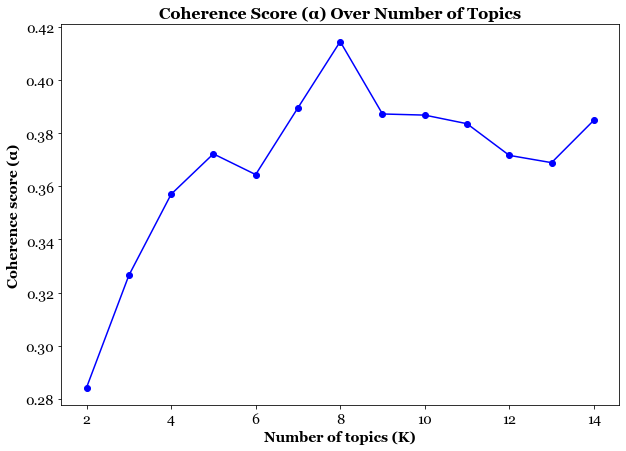

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values,'b-o')
plt.xlabel("Number of topics (K)", {'fontsize': 14, 'fontweight': 'bold'})
plt.ylabel("Coherence score (α)", {'fontsize': 14, 'fontweight': 'bold'})
plt.title('Coherence Score (α) Over Number of Topics', {'fontsize': 16, 'fontweight': 'bold'});
plt.show()

# 6. LDA modelling

In [6]:
num_topics = 8
alphatot = 12.5
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus, 
                                   id2word=id2word, 
                                   num_topics=num_topics,
                                   alpha=[alphatot/num_topics] * num_topics,
                                   random_state=430,
                                   iterations=15, passes=50)
lda_model.show_topics(num_words=10, formatted=True)

[(0,
  '0.053*"critical_thinking" + 0.025*"st_century" + 0.020*"ability" + 0.016*"creative_thinking" + 0.014*"information" + 0.012*"technology" + 0.011*"data" + 0.011*"communication" + 0.010*"creativity" + 0.008*"need"'),
 (1,
  '0.053*"test" + 0.036*"assessment" + 0.032*"instrument" + 0.019*"item" + 0.017*"level" + 0.014*"question" + 0.013*"ability" + 0.012*"measure" + 0.009*"development" + 0.008*"analysis"'),
 (2,
  '0.034*"science" + 0.019*"education" + 0.015*"scientific_literacy" + 0.013*"thinking_skill" + 0.012*"thinking" + 0.012*"ability" + 0.012*"school" + 0.012*"knowledge" + 0.010*"scientific" + 0.009*"level"'),
 (3,
  '0.031*"misconception" + 0.030*"understanding" + 0.017*"representation" + 0.010*"conception" + 0.010*"conceptual_understanding" + 0.010*"scientific" + 0.009*"level" + 0.009*"phenomenon" + 0.009*"difficulty" + 0.008*"science"'),
 (4,
  '0.032*"model" + 0.021*"activity" + 0.018*"science_process" + 0.011*"inquiry" + 0.011*"achievement" + 0.010*"class" + 0.010*"scien

In [288]:
# Compute Coherence Score
coherence_lda = gensim.models.CoherenceModel(model=lda_model, 
                                             texts=data_words_bigrams, 
                                             dictionary=id2word, 
                                             coherence='c_v',
                                             topn=20).get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.41443911383764254


In [289]:
print("Distribution vector for topic 8: ", lda_model.get_topics()[2], "\n")

print("Maximum value: {} corresponding to the word {}".format(np.amax(lda_model.get_topics()[2]), id2word[np.argmax(lda_model.get_topics()[2])]))
print("Minimum value: {} corresponding to the word {}".format(np.amin(lda_model.get_topics()[2]), id2word[np.argmin(lda_model.get_topics()[2])]))

Distribution vector for topic 8:  [1.2386945e-02 6.8159975e-06 4.0394254e-04 ... 2.5670498e-04 6.8845725e-06
 6.8331537e-06] 

Maximum value: 0.03374600410461426 corresponding to the word science
Minimum value: 6.809947535657557e-06 corresponding to the word fourtier


# 7. Topic characteristic of Indonesian PER community

In [291]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, id2word, sort_topics=False) 
pyLDAvis.display(vis)

# 8. Find the weight of topics in each document

In [7]:
def get_weight_in_doc(ldamodel, corpus, doc_num, fill=0):
    num_topics = ldamodel.num_topics
    weights = [fill] * num_topics
    # Get a list of tuples with the detected topics and weights
    row = ldamodel[corpus][doc_num]
    # Process the output to return a list of weights
    tw = list(zip(*row))
    for topic in range(num_topics):
        if topic in tw[0]:
            ind = tw[0].index(topic)
            weights[topic] = tw[1][ind]
    return weights

def get_weight_per_doc(ldamodel, corpus):
    num_topics = ldamodel.num_topics
    dataframe = pd.DataFrame(np.zeros((len(corpus),num_topics)), columns=list(range(num_topics)))
    dataframe.index.name = 'Topic weights'
    for i, row in dataframe.iterrows():
        dataframe.iloc[i] = pd.Series(get_weight_in_doc(ldamodel, corpus, i))
    return dataframe

weights = get_weight_per_doc(lda_model, bow_corpus)

In [8]:
# Load the DataFrame with processed text
df = pd.read_excel('paper_metadata.xlsx')
# Concatenate the topic weights
df = pd.concat([df, weights], axis = 1)
df.head(5)

,filename,year,title,author,0,1,2,3,4,5,6,7
0,ICMSE_14_Wahyuni,2014,Analysis of experiment skill of university stu...,"Wahyuni, S.",0.015147,0.034391,0.049438,0.075355,0.083129,0.064154,0.021859,0.656527
1,ICMSE_14_Handayani,2014,Content and language integrated learning (CLIL...,"Handayani, et al",0.274658,0.032223,0.222687,0.245961,0.027647,0.055154,0.085051,0.056618
2,ICMSE_14_Susilawati,2014,The effect of teaching material of physics bas...,Susilawati & Khoiri,0.050198,0.040039,0.023971,0.020474,0.696313,0.039195,0.058732,0.071078
3,ICMSE_14_Reffiani,2014,The analysis of teachers’ book for learning na...,Reffiani & Saptaningrum,0.021032,0.038389,0.018268,0.025936,0.018146,0.595105,0.259496,0.023627
4,ICMSE_14_Sarwi,2014,Utilization of the experimental open-inquiry t...,Sarwi & Astuti,0.059695,0.024372,0.155775,0.031284,0.148112,0.019209,0.019609,0.541945


# 9. The representative papers in each topic

In [9]:
pd.set_option('display.max_colwidth', 150)
for t in range(num_topics):
    print("Topic {}: {}".format(t,lda_model.print_topics(num_words=10)[t][1]))
    df.sort_values(by=t, ascending=False)[['year','title','filename',t]][:10]
    print('\n\n')

Topic 0: 0.053*"critical_thinking" + 0.025*"st_century" + 0.020*"ability" + 0.016*"creative_thinking" + 0.014*"information" + 0.012*"technology" + 0.011*"data" + 0.011*"communication" + 0.010*"creativity" + 0.008*"need"


,year,title,filename,0
476,2019,Profile of students’ critical thinking ability in project based learning integrated science technology engineering and mathematics,ICMScE19_Eja,0.812526
505,2020,Gender differences in digital literacy among prospective physics teachers,ICMScE20_Rizal,0.799888
730,2018,Profile of senior high school in-service physics teachers’ technological pedagogical and content knowledge (TPACK),ICRIEMS18_Masrifah,0.776225
479,2019,Developing creative thinking skills of STKIP weetebula students through physics crossword puzzle learning media using eclipse crossword app,ICMScE19_Anggraeni,0.770805
513,2020,Evaluation of critical thinking skills of class x high school students on the material of Newton’s laws,ICMScE20_Febriana,0.759807
202,2019,Examining the relationship between students' motivation and critical thinking skills in learning torque and static equilibrium,ICMSE_19_Andriani,0.717181
281,2020,Analysis of the combination aspects of creativity level in product design for physics students in basic physics learning,ICMSE_20_Edie,0.708057
206,2019,Video tracker analysis: a strategy for measuring students communication and collaboration skills,ICMSE_19_Fianti,0.698072
425,2018,Correlation of cognitive ability relevance to the ability of scientific creative thinking and scientific critical thinking skills of students of w...,ICMScE18_Rusnayati,0.696568
288,2020,The effectiveness of hypercontent module to improve creative thinking skills of prospective physics teachers,ICMSE_20_Rufaida,0.681404





Topic 1: 0.053*"test" + 0.036*"assessment" + 0.032*"instrument" + 0.019*"item" + 0.017*"level" + 0.014*"question" + 0.013*"ability" + 0.012*"measure" + 0.009*"development" + 0.008*"analysis"


,year,title,filename,1
663,2015,APPLYING CONTENT VALIDITY RATIOS (CVR) TO THE QUANTITATIVE CONTENT VALIDITY OF PHYSICS LEARNING ACHIEVEMENT TESTS,ICRIEMS15_Supahar,0.874647
603,2021,AN EIGHT-CATEGORY PARTIAL CREDIT MODEL AS VERY APPROPRIATE FOR FOUR-TIER DIAGNOSTIC TEST SCORING IN PHYSICS LEARNING,ISSE_21_Istiyono,0.873451
742,2019,Developing of Bloomian HOTS Physics Test: Content and Construct Validation of The PhysTeBloHOTS,ICRIEMS19_Istiyono,0.866093
50,2016,Instrument test physics based computer adaptive test to meet the asian economic community literature review,ISSE_16_Ermansah,0.860903
243,2020,Implementation of Item Response Theory at Final Exam Test in Physics Learning: Rasch Model Study,ISSE_20_Asriadi,0.858166
408,2018,Analyzing instrument characteristics of critical thinking skills and mastery of concepts based on item response theory,ICMScE18_Muiz,0.827360
108,2018,Constructing Reasoning Multiple Choice Test to Measure Bloomian Higher Order Thinking Skills in Physics of XI Grade Students,ISSE_18_Muthmainnah,0.795916
178,2019,The development of CAT-MARZANO as an assessment media in the industrial revolution 4.0,ISSE_19_Patria,0.759538
773,2020,Analysis of Validity and Reliability of Diagnostic Test of Picture Representation Ability in High School Physics Learning,ICRIEMS20_Nirmala,0.756153
658,2015,THE DEVELOPING AN ASSESSMENT INSTRUMENT BASED ON BOARD GAMES TO MEASURE PHYSICS LEARNING ACHIEVEMENT OF SENIOR HIGH SCHOOL STUDENTS,ICRIEMS15_Istiyono,0.733880





Topic 2: 0.034*"science" + 0.019*"education" + 0.015*"scientific_literacy" + 0.013*"thinking_skill" + 0.012*"thinking" + 0.012*"ability" + 0.012*"school" + 0.012*"knowledge" + 0.010*"scientific" + 0.009*"level"


,year,title,filename,2
642,2014,"MAPPING OF PROFESSIONAL, PEDAGOGICAL, SOCIAL, AND PERSONAL COMPETENCE OF SENIOR HIGH SCHOOL PHYSICS TEACHERS IN YOGYAKARTA SPECIAL REGION",ICRIEMS14_Jumadi,0.771567
556,2016,Analysis of Scientific Literacy Through PISA 2015 Framework,ICMScE16_Arsyad,0.765795
71,2017,Shifting attitude from receiving to characterisation as an interdisciplinary learning toward ecological phenomena,ISSE_17_Napitupulu,0.734563
35,2016,Promoting metacognition and students’ care attitude towards the environment through learning physics with STEM,ISSE_16_Rahzianta,0.707189
713,2018,Analysis of Senior High School Students’ Higher Order Thinking Skills in Physics Learning,ICRIEMS18_Maulita,0.689854
518,2020,Inventory of scientific literacy ability of junior high school students based on the evaluation of PISA framework competency criteria,ICMScE20_Amini,0.683210
598,2021,Enhancing Scientific Literacy and Analytical Thinking Skills Using Problem Based Learning Model in Physics,ISSE_21_Setiaji,0.681146
31,2015,Analysis student's level of science literacy in class x sman khusus jeneponto,ICMSE_15_Riskawati,0.662869
455,2019,The exploration of character education contents in the physics textbooks about newton’s law,ICMScE19_Dewi,0.658056
380,2018,The application of scientific approach to improve scientific literacy on domain competency at secondary school on dynamic electricity topic,ICMScE18_Sulsilah,0.654485





Topic 3: 0.031*"misconception" + 0.030*"understanding" + 0.017*"representation" + 0.010*"conception" + 0.010*"conceptual_understanding" + 0.010*"scientific" + 0.009*"level" + 0.009*"phenomenon" + 0.009*"difficulty" + 0.008*"science"


,year,title,filename,3
433,2018,Alternative conception of high school students related to the concepts in the simple electric circuit subject matter,ICMScE18_Wardiyah,0.878730
393,2018,Identification of student misconception about static fluid,ICMScE18_Saputra,0.873717
24,2015,External representation to overcome misconception in physics,ICMSE_15_Handhika,0.869757
398,2018,"Teachers, pre-service teachers, and students understanding about the heat conduction",ICMScE18_Anam,0.868754
554,2020,Identify students' conception and level of representations using five-tier test on wave concepts,ICMScE20_Wiyantara,0.848598
443,2019,Concept progression of high school students related to the concept of parallel electric circuits as the effect of applying CCROI integrated with T...,ICMScE19_Basori,0.830134
391,2018,Learning progression of madrasah aliyah-students in remedial teaching about interaction of an electrically charged object with a neutral object co...,ICMScE18_Mahmudah,0.828173
399,2018,Analysis of elementary school students’ misconception on force and movement concept,ICMScE18_Sari,0.824777
586,2017,Facilitating conceptual change in students’ understanding on magnetic poles concept by using CSCCtext,ICMScE17_Mukrimatussa,0.814256
60,2016,Study on latent misunderstanding on electrical current concept and its impact,ICMSE_16_Hindarto,0.805145





Topic 4: 0.032*"model" + 0.021*"activity" + 0.018*"science_process" + 0.011*"inquiry" + 0.011*"achievement" + 0.010*"class" + 0.010*"science" + 0.010*"learning_outcome" + 0.009*"scientific" + 0.008*"knowledge"


,year,title,filename,4
662,2015,THE EFFECTIVENESS OF LOCAL CULTURE-BASED PHYSICS MODEL OF TEACHING IN DEVELOPING PHYSICS COMPETENCE AND NATIONAL CHARACTER,ICRIEMS15_Suastra,0.846402
558,2016,Cooperative Learning Model Design Based On Collaborative Game-Based Learning Approach As A Soft Scaffolding Strategy: Preliminary Research,ICMScE16_Nurulsari,0.783864
704,2018,Effect of Free Inquiry Models to Learning Achievement and Character of Student Class IX,ICRIEMS18_Kaleka,0.773977
318,2017,Training Students’ Science Process Skills through Didactic Design on Work and Energy,ICMScE17_Ramayanti,0.769478
439,2019,The effects of cooperative learning model think pair share assisted by animation media on learning outcomes of physics in high school,ICMScE19_Astra,0.764887
559,2016,Cooperative Learning Model Application Type Of Student Teams Achievement Divisions ( Stad ) Increase In The Process Of Science Student Skills,ICMScE16_Trisnawati,0.751929
100,2018,Optimizing Senior High School Students Creative Thinking Skills of Optical Devices through Inductive Learning Models Assisted by e-Mind Map,ISSE_18_Lazuardini,0.727182
6,2014,The effectiveness of learning cycle model assisted by mind mapping technique to physics conceptual achievement according to science process skill...,ICMSE_14_Bachtiar,0.724177
211,2019,Analysis of high school students' science process skills,ICMSE_19_Indri,0.714978
18,2015,The development of Android-based mini book for facilitating student in learning physics and as a learning media to reduce physical misconception,ISSE_15_Muqarrobin,0.705325





Topic 5: 0.035*"problem" + 0.028*"problem_solving" + 0.023*"ability" + 0.012*"knowledge" + 0.011*"solve_problem" + 0.010*"improve" + 0.010*"understanding" + 0.009*"problemsolving_skill" + 0.009*"approach" + 0.009*"model"


,year,title,filename,5
265,2020,The Effect of E-Learning Based Worksheet to Improve Problem Solving Ability of Senior High School Students,ISSE_2020_Septiyono,0.812199
809,2019,The Analysis of Students’ Problem-Solving Ability in the 5E Learning Cycle with Formative E-Assessment,ICOMSE_19_Yuliana,0.797343
624,2021,The Development of Physics E-Book Based on Contextual Teaching and Learning to Increase Student Problem-Solving Skill,ISSE_21_Fitriadi,0.791704
166,2019,Improving students' problem-solving skills through quick on the draw model assisted by the optical learning book integrated the Pancasila,ISSE_19_Himawan,0.785411
616,2021,Profile of Problem Solving Ability of Islamic Senior High School Students on Momentum and Impuls,ISSE_21_Sakti,0.766386
156,2019,Implementation of physics learning media based on android integrated earthquake disaster education to enhance problem solving abilities and natura...,ISSE_19_Abdillah,0.751363
506,2020,Experiential learning using STEM approach in improving students’ problem solving ability,ICMScE20_Lestari,0.751124
172,2019,"Integrated landslide disaster education in physics subject viewed from high school students preparedness in Kulon Progo, Yogyakarta",ISSE_19_Labibah,0.733441
297,2020,Development of simulation integrated learning model with mikir approach to school for disaster mitigation,ICMSE_20_Rusilowati,0.732279
653,2014,IMPROVING THE RESULT OF PHYSICS STUDY OF THE STUDENTS ON CIRCULAR MOTION TOPIC BY USING PROJECT BASED LEARNING,ICRIEMS14_Nurhasanah,0.730731





Topic 6: 0.037*"medium" + 0.022*"development" + 0.021*"material" + 0.017*"technology" + 0.016*"use" + 0.010*"education" + 0.009*"online" + 0.008*"school" + 0.008*"teaching_material" + 0.008*"module"


,year,title,filename,6
251,2020,Developing Whiteboard Animation Video Through Local Wisdom on Work and Energy Materials As Physics Learning Solutions During The Covid-19 Pandemic,ISSE_2020_Anggraeni,0.874423
775,2020,Android-Based Carrom Game Comics Integrated with Discovery Learning for Physics Teaching,ICRIEMS20_Rahayu,0.864291
158,2019,Development of physics mobile learning media in optical instruments for senior high school student using android studio,ISSE_19_Aji,0.843402
255,2020,Smartphone-based Learning Media on Microscope Topic for High School Students,ISSE_2020_Nadhiroh,0.830731
39,2016,Android for the 21st century learning media and its impact on students,ISSE_16_Adi,0.824935
257,2020,Development of Interactive Physics Learning Media Using Smartphone Integrated with Pancasila Values on Optical Instrument,ISSE_2020_Nabila,0.817989
707,2018,Development of Physics Instructional Media by Using The Cultural Theme (Rowboat) Based on Android Mobile Phone for Junior High School Students,ICRIEMS18_Lestari,0.805466
758,2020,Developing Android-Based Marbles Game Comics Using Group Investigation Model in Physics Learning,ICRIEMS20_Damayanti,0.804216
747,2019,Developing Physics Comic Media a Local Wisdom: Sulamanda (Engklek) Traditional Game Chapter of Impulse and Momentum,ICRIEMS19_Sari,0.800016
223,2019,Moodle as e-learning media in physics class,ICMSE_19_Putri,0.797452





Topic 7: 0.020*"experiment" + 0.013*"course" + 0.012*"laboratory" + 0.010*"motion" + 0.010*"method" + 0.009*"experimental" + 0.009*"tool" + 0.008*"practicum" + 0.007*"understanding" + 0.007*"activity"


,year,title,filename,7
605,2021,Simple Vertical Upward Motion Experiment using Smartphone based Phyphox App for Physics Learning,ISSE_21_Janah,0.864888
282,2020,The Atwood machine experiment assisted by smartphone acceleration sensor for enhancing classical mechanics experiments,ICMSE_20_Listiaji,0.853038
176,2019,Development of sound wave experimentation tools influenced by wind velocity,ISSE_19_Maisyaroh,0.840099
584,2017,Analysis of simple harmonic spring motion using tracker software,ICMScE17_Muiz,0.826760
44,2016,Real laboratory based learning using video tracker on terminal velocity,ISSE_16_Ristanto,0.824262
504,2020,Determination of refractive index on three mediums based on the principle of refraction of light,ICMScE20_Malik,0.804057
547,2020,Real-time data acquisition of dynamic moving objects,ICMScE20_Saputra,0.800845
386,2018,Damping Harmonic Oscillator (DHO) for learning media in the topic damping harmonic motion,ICMScE18_Festiana,0.783313
201,2019,The determination of fluid viscosity using tracker-assisted falling ball viscosimeter,ICMSE_19_Akhlis,0.779363
216,2019,Learning outcomes of entropy concept in thermodynamics,ICMSE_19_Linuwih,0.775083


# 10. Development of Indonesian PER topics between 2014 - 2021

In [10]:
topic_names = ["1. 21 st century skill", "2. Assessment","3. Science literacy","4. Conceptual understanding","5. Research based instruction","6. Problem solving","7. Educational technology", "8. Physics laboratory"]

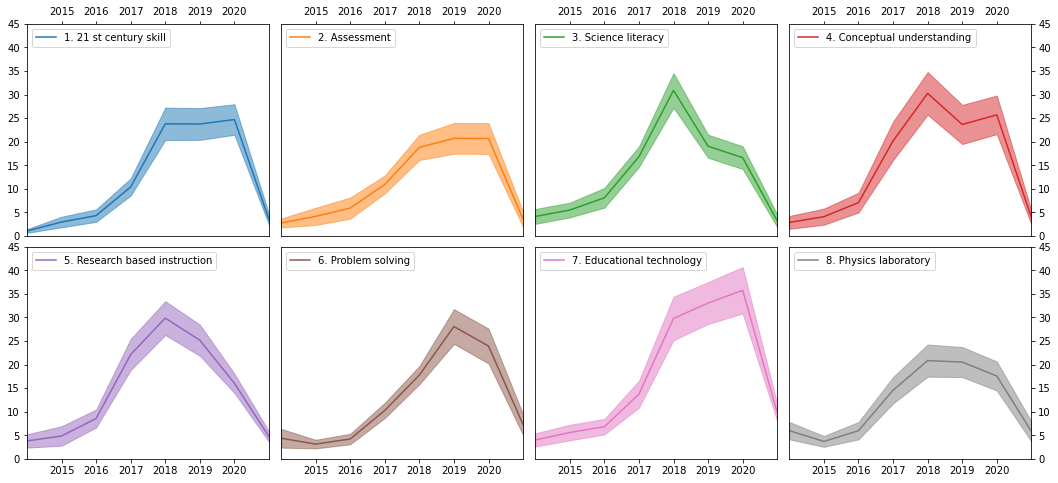

In [36]:
from sklearn.model_selection import RepeatedKFold
n_splits = 5
kf = RepeatedKFold(n_splits=n_splits, n_repeats=20, random_state=1)

func = np.sum
years = range(df.year.min(), df.year.max()+1) 

fig = plt.figure(figsize=(18,8));
#fig.suptitle('\nCumulative Topic Prevalence Over Time', y=1.0);

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for z in range(8):
    ax = fig.add_subplot(2,4,z+1)
    y = df.groupby('year').agg(func)[z];
    # 5-Fold CV
    err = []
    for year in years:
        df_at_zyear = df.loc[df.year == year][z]
        # Rescale the sum on its length
        estimators = [func(df_at_zyear.iloc[ind_train])*len(df_at_zyear)/len(ind_train) for ind_train, _ in kf.split(df_at_zyear)]
        err.append(np.std(estimators) * 3)
    line, = ax.plot(y, color=cycle[z])
    _ = ax.fill_between(y.index, y-err, y+err, color = line.get_color(), alpha=0.5);
    _ = ax.legend([topic_names[z]], loc='upper left');
    _ = ax.set_xlim([2014,2021]);
    _ = ax.set_xticks([2015, 2016, 2017, 2018, 2019, 2020])
    _ = ax.set_ylim([0,45]);
    if z < 4:
        ax.xaxis.tick_top()
    if z in [3,7]:
        ax.yaxis.tick_right()
    elif z % 4 != 0:
        _ = ax.set_yticks([]);
    
    plt.subplots_adjust(wspace=0.05, hspace=0.05);

## A. The average of percentage of topic in each document for a year

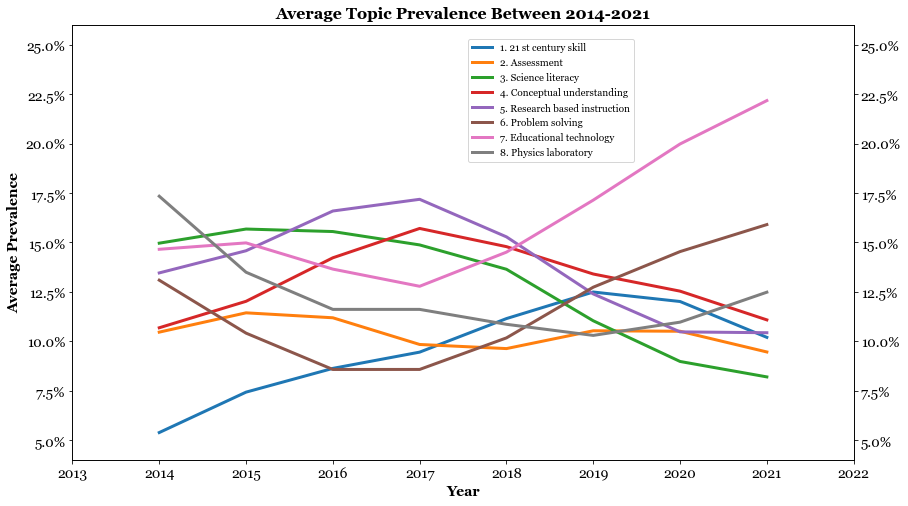

In [42]:
plt.rcParams.update({'font.size': 14}) #set the font size for the figure
plt.rcParams["font.family"] = "Georgia"
d = dict(zip(range(lda_model.num_topics),topic_names))
df_prevalnorm = df.groupby('year').agg('mean').rolling(3, min_periods=1, center=True, win_type='triang').mean()
fig, ax1 = plt.subplots(figsize=(14,8))
t = list(df_prevalnorm.index)
for i in df_prevalnorm.columns:
    ax1.plot(t, df_prevalnorm.loc[:,i], linewidth=3, label='%s'%d[i])
ax1.set_xlabel('Year', {'fontsize': 14, 'fontweight': 'bold'})
ax1.set_xlim(2013,2022)
ax1.set_ylim(0.04,0.26)
from matplotlib.ticker import PercentFormatter
ax1.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))
ax1.set_ylabel('Average Prevalence', {'fontsize': 14, 'fontweight': 'bold'})
ax2 = ax1.twinx()
ax2.yaxis.set_major_formatter(PercentFormatter(1, decimals=1))
ax2.set_ylim(ax1.get_ylim())
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 0.48, 0.5, 0.5), prop={'size': 10})
plt.title('Average Topic Prevalence Between 2014-2021', {'fontsize': 16, 'fontweight': 'bold'});

## B. The sum of percentage of topic in each document for a year

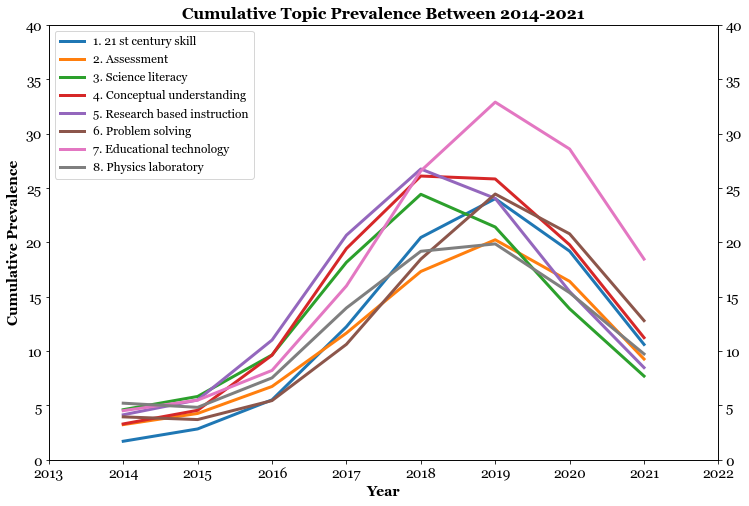

In [38]:
from matplotlib.ticker import PercentFormatter
df_prevalsum = df.groupby('year').agg('sum').rolling(3, min_periods=1, center=True, win_type='triang').mean()
fig, ax1 = plt.subplots(figsize=(12,8))
t = list(df_prevalsum.index)
for i in df_prevalsum.columns:
    ax1.plot(t, df_prevalsum.loc[:,i], linewidth=3, label='%s'%d[i])
ax1.set_xlabel('Year', {'fontsize': 14,'fontweight': 'bold'})
ax1.set_xlim(2013,2022)
#ax1.yaxis.set_major_formatter(PercentFormatter(100, decimals=0))
ax1.set_ylim(0,40)
ax1.set_ylabel('Cumulative Prevalence', {'fontsize': 14,'fontweight': 'bold'})
ax2 = ax1.twinx()
#ax2.yaxis.set_major_formatter(PercentFormatter(100, decimals=0))
ax2.set_ylim(ax1.get_ylim())
ax1.legend(loc='upper left', prop={'size': 12})
plt.title('Cumulative Topic Prevalence Between 2014-2021', {'fontsize': 16, 'fontweight': 'bold'});

In [25]:
df_prevalnorm

,0,1,2,3,4,5,6
year,,,,,,,
2014.0,0.098486,0.129675,0.126383,0.157377,0.140166,0.193519,0.154394
2015.0,0.114250,0.141224,0.132414,0.151207,0.137836,0.164541,0.158528
2016.0,0.127346,0.150945,0.141182,0.149163,0.126899,0.149829,0.154635
2017.0,0.134279,0.157043,0.156233,0.146878,0.121650,0.132402,0.151517
2018.0,0.137434,0.153031,0.157391,0.151810,0.120924,0.132135,0.147276
2019.0,0.136585,0.145436,0.152380,0.165153,0.123178,0.138098,0.139170
2020.0,0.137539,0.139569,0.142924,0.178260,0.123326,0.149572,0.128811
2021.0,0.136355,0.138168,0.140141,0.194532,0.117064,0.161999,0.111741


In [26]:
df_prevalsum

,0,1,2,3,4,5,6
year,,,,,,,
2014.0,3.616095,4.570423,4.282954,5.387052,4.738685,6.401769,5.336354
2015.0,5.711822,7.114054,6.896201,7.063337,6.177969,7.277105,7.384512
2016.0,10.111024,12.065679,12.068620,11.090932,9.289859,10.511684,11.528869
2017.0,16.367081,19.057147,19.916923,17.757271,14.563087,15.543811,18.016902
2018.0,21.955969,24.148306,25.242601,24.144663,19.534456,20.605262,23.479853
2019.0,22.107816,23.383214,24.478179,25.761725,20.085473,21.423584,23.315565
2020.0,19.354750,19.627241,20.247749,23.524194,17.885735,19.750167,19.735164
2021.0,14.053662,14.060743,14.444808,18.477400,12.970236,15.483354,13.509796
